# 🛳️ Titanic Survival Data Analysis

**Course Task:** Task 2  Exploratory Data Analysis (EDA)

**Dataset:** [Titanic: Machine Learning from Disaster (Kaggle)](https://www.kaggle.com/c/titanic/data)

**Prepared by:** Sarosh Ramzani  
**Date:** November 2025

---

### 🎯 Objective:
To explore the Titanic dataset using Python and perform the following steps:
- Clean the data (handle missing values and data types)
- Generate summary statistics and insights (e.g., survival by gender, class)
- Visualize patterns and correlations using Seaborn & Matplotlib

---

### 🧰 Tools & Libraries:
- Python (Pandas, NumPy)
- Seaborn
- Matplotlib

---


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")


In [3]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [4]:
import pandas as pd
titanic = pd.read_csv('train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()          # Column types & missing data
titanic.describe()      # Summary stats
titanic.isnull().sum()  # Missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Future-proof and safe version
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic.drop(columns=['Cabin'], inplace=True, errors='ignore')


In [9]:
# Survival rate by gender
titanic.groupby('Sex')['Survived'].mean()

# Survival rate by class
titanic.groupby('Pclass')['Survived'].mean()

# Survival by gender and class
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


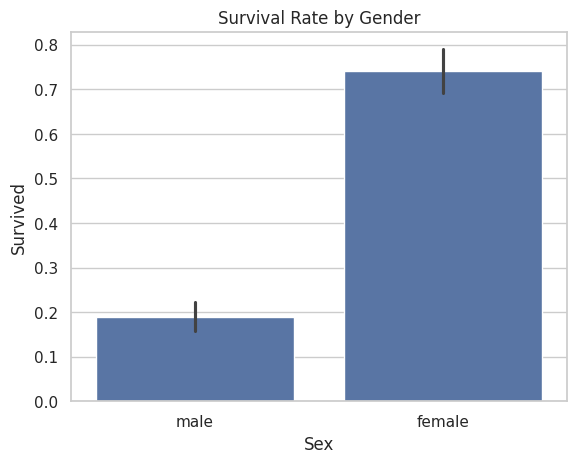

In [10]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()


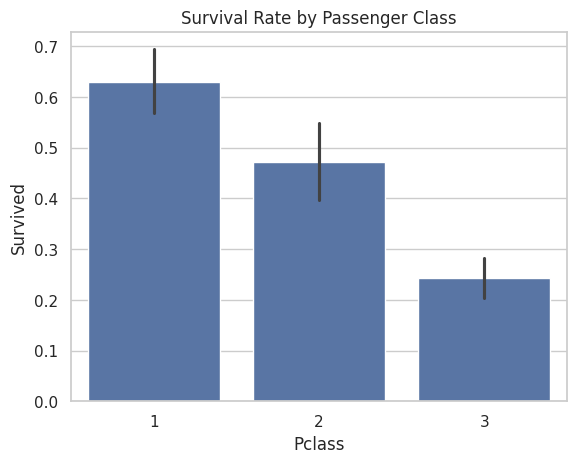

In [11]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()


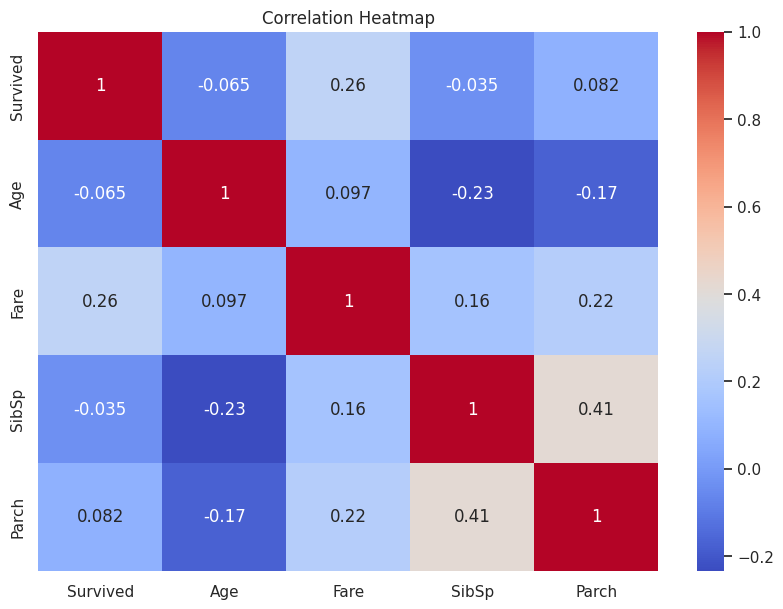

In [14]:
numeric_cols = ['Survived','Age','Fare','SibSp','Parch']
corr = titanic[numeric_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 📍 Observations
- Female passengers had a higher survival rate than males.  
- 1st-class passengers survived more often than 3rd-class.  
- Age shows a slight negative correlation with survival.


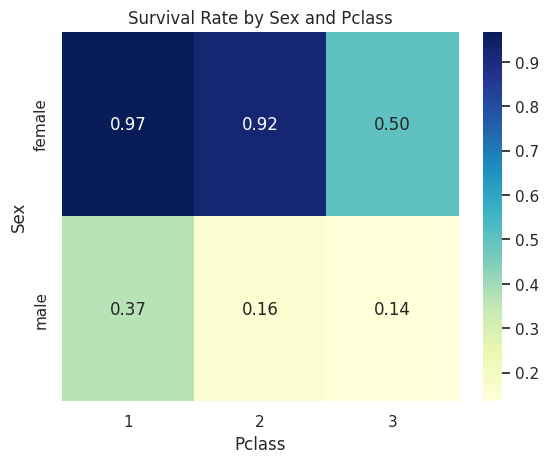

In [15]:
pt = titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')
sns.heatmap(pt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Survival Rate by Sex and Pclass')
plt.show()
